# Laboratorio 1: Algoritmo de Canny

Eddson Sierra

In [4]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

In [132]:
def ReadShowGray(strImg):
    img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    return img

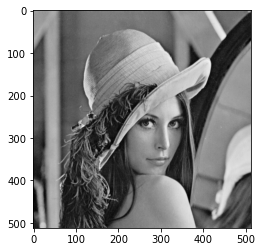

In [150]:
strImg = 'lena_color_512.tif'
img = ReadShowGray(strImg)

In [73]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    
    return newImg

In [88]:
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    newX = np.zeros((alto, ancho, 1))
    
    kernel = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]], dtype = float)
    img = convolutional_filter(img, kernel)
    
    for i in range(0,alto-1):
        for j in range(0,ancho-1):
            dx = img[i,j+1] - img[i,j]
            newX[i,j] = dx          
    return newX

In [151]:
derivadax = derivadaX(img)
cv2.imwrite("derivadax.jpg",derivadax)

True

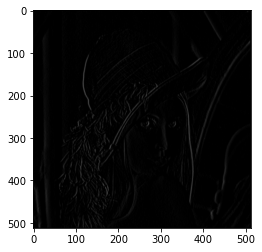

array([[  0,   1,   1, ...,   0,   0,   0],
       [163,   2,   0, ...,   0,   1,   1],
       [160,   0,   1, ...,   1,   0,   0],
       ...,
       [ 46,   3,   0, ...,   0,   0,   0],
       [ 44,   7,   2, ...,   1,   1,   0],
       [  1,   0,   2, ...,   1,   0,   0]], dtype=uint8)

In [152]:
ReadShowGray("derivadax.jpg")

In [95]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    newY = np.zeros((alto, ancho, 1))
    
    kernel = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]], dtype = float)
    img = convolutional_filter(img, kernel)
    
    for i in range(0,alto-1):
        for j in range(0,ancho):
            dy = img[i+1,j] - img[i,j]
            newY[i,j] = dy          
    return newY  

In [153]:
derivaday = derivadaY(img)
cv2.imwrite("derivaday.jpg",derivaday)

True

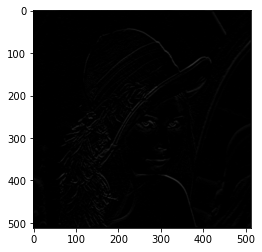

array([[  0, 162, 161, ..., 166, 153,   1],
       [  0,   1,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   4,   0,   1],
       ...,
       [  0,   0,   1, ...,   2,   2,   1],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [154]:
ReadShowGray("derivaday.jpg")

In [104]:
def magnitud(dx, dy):
    alto = dx.shape[0]
    ancho = dy.shape[1]
    mag = np.zeros((alto, ancho, 1))
    
    for i in range(0,alto):
        for j in range(0,ancho):
            mg = math.sqrt(dx[i,j]**2+dy[i,j]**2)
            mag[i,j] = mg          
    return mag

In [155]:
magImg = magnitud(derivadax, derivaday)
cv2.imwrite("magnitud.jpg",magImg)

True

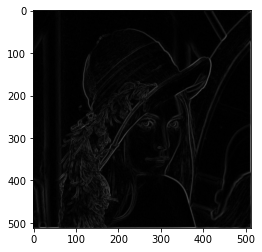

array([[  0, 162, 160, ..., 169, 148,   2],
       [163,   0,   1, ...,  14, 153,   0],
       [161,   2,   0, ...,  15, 152,   2],
       ...,
       [ 45,   7,   1, ...,   2,  98,   1],
       [ 47,  42,  51, ...,  99, 152,   0],
       [  0,   1,   0, ...,   3,   0,   1]], dtype=uint8)

In [156]:
ReadShowGray("magnitud.jpg")

In [109]:
def fase(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    fase = np.zeros((alto, ancho, 1))
    
    for i in range(0,alto):
        for j in range(0,ancho):
            angulo = int((180/math.pi)*math.atan2(dy[i,j],dx[i,j]))
            fase[i,j] = angulo
    return fase 

In [157]:
faseImg = fase(derivadax, derivaday)
cv2.imwrite("fase.jpg",faseImg)

True

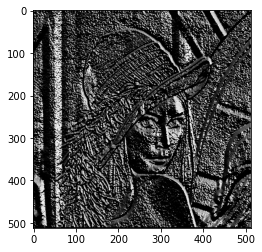

array([[  3,  87,  92, ...,  95,  88,   1],
       [  0, 183,   0, ..., 175, 181,   0],
       [  2, 180,   1, ..., 183, 182,   0],
       ...,
       [  0,  18,  45, ...,  88, 178,   2],
       [  0,   1,   1, ...,   3,   0,   0],
       [  1,   0,   0, ...,   0,   0,   1]], dtype=uint8)

In [158]:
ReadShowGray("fase.jpg")

In [108]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg

In [159]:
nms = non_maximum_suppression(magImg, faseImg)
cv2.imwrite("nms.jpg",nms)

True

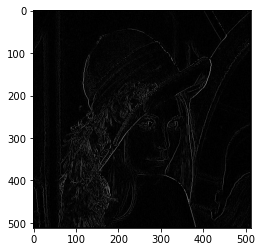

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [160]:
ReadShowGray("nms.jpg")

In [168]:
def threshold(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0,ancho):
            if(img[i,j] > 8):
                newImg[i,j] = 255
            else:
                newImg[i,j] = 0
                
    return newImg

In [169]:
imgCanny = threshold(nms)
cv2.imwrite("CannyOut.jpg",imgCanny)

True

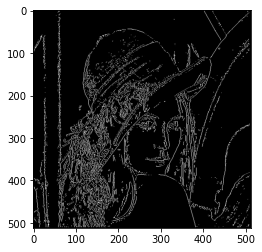

In [170]:
manual = ReadShowGray("CannyOut.jpg")

### Algoritmo de Canny con OpenCV

In [163]:
edges = cv2.Canny(img, 100,200)
cv2.imwrite("CannyOutOpenCV.jpg",edges)

True

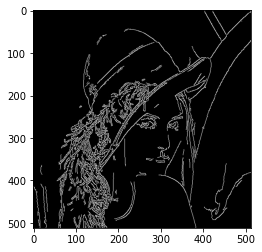

In [164]:
CannyOpenCV = ReadShowGray("CannyOutOpenCV.jpg")